# Construction Risk Prediction

This dataset is designed for whole life cycle management of civil engineering projects, integrating Building Information Modeling (BIM) and Artificial Intelligence (AI). It includes comprehensive project data covering cost, schedule, structural health, environmental conditions, resource allocation, safety risks, and drone-based monitoring.
_____________________________
Key Features
Project Metadata: ID, type (bridge, road, building, etc.), location, and timeline.
Financial Data: Planned vs. actual cost, cost overruns.
Scheduling Data: Planned vs. actual duration, schedule deviation.
Structural Health Monitoring: Vibration levels, crack width, load-bearing capacity.
Environmental Factors: Temperature, humidity, air quality, weather conditions.
Resource & Safety Management: Material usage, labor hours, equipment utilization, accident records.
Drone-Based Monitoring: Image analysis scores, anomaly detection, completion percentage.
Target Variable: Risk Level (Low, Medium, High) based on cost, schedule, safety, and structural health.
Use Cases
Predictive Modeling: Train AI models to forecast project risks and optimize decision-making.
BIM & AI Integration: Leverage real-time IoT and drone data for smart construction management.
Risk Assessment: Identify early signs of cost overruns, delays, and structural failures.
Automation & Efficiency: Develop automated maintenance and safety monitoring frameworks
_______________________________
This file contains structured data for whole life cycle management of civil engineering projects using BIM and AI integration. It includes key attributes related to cost, schedule, structural health, environmental conditions, and risk assessment, enabling predictive analytics for optimized project execution.

Each row represents a construction project or a specific project phase, with multiple variables capturing real-time IoT sensor data, drone-based monitoring, and historical construction records. The target column (Risk Level: Low, Medium, High) allows for supervised machine learning applications in risk prediction and resource optimization.

In [28]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# load file
df = pd.read_csv('bim_ai_civil_engineering_dataset.csv')
df.sample(3)

,Project_ID,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,...,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
609,PJT_610,Bridge,Chicago,2021-09-01,2024-01-24,19664179,2.453281e+07,4.868628e+06,502,720.863314,...,11092.036820,482.215143,7405,61.836333,8,4.312349,77.576624,0,12.133472,Medium
65,PJT_66,Tunnel,Houston,2020-03-06,2021-12-22,37540128,3.973869e+07,2.198566e+06,669,999.020593,...,48101.869572,589.813082,6480,81.719764,9,3.185184,70.229933,0,54.442524,Medium
374,PJT_375,Bridge,Seattle,2021-01-09,2022-01-06,18014415,2.509586e+07,7.081441e+06,801,1163.309546,...,27533.987363,759.884324,7161,93.440716,2,1.095102,85.790979,1,95.494835,Medium


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project_ID             1000 non-null   object 
 1   Project_Type           1000 non-null   object 
 2   Location               1000 non-null   object 
 3   Start_Date             1000 non-null   object 
 4   End_Date               1000 non-null   object 
 5   Planned_Cost           1000 non-null   int64  
 6   Actual_Cost            1000 non-null   float64
 7   Cost_Overrun           1000 non-null   float64
 8   Planned_Duration       1000 non-null   int64  
 9   Actual_Duration        1000 non-null   float64
 10  Schedule_Deviation     1000 non-null   float64
 11  Vibration_Level        1000 non-null   float64
 12  Crack_Width            1000 non-null   float64
 13  Load_Bearing_Capacity  1000 non-null   float64
 14  Temperature            1000 non-null   float64
 15  Humid

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(1000, 28)

In [33]:
df.columns

Index(['Project_ID', 'Project_Type', 'Location', 'Start_Date', 'End_Date',
       'Planned_Cost', 'Actual_Cost', 'Cost_Overrun', 'Planned_Duration',
       'Actual_Duration', 'Schedule_Deviation', 'Vibration_Level',
       'Crack_Width', 'Load_Bearing_Capacity', 'Temperature', 'Humidity',
       'Weather_Condition', 'Air_Quality_Index', 'Energy_Consumption',
       'Material_Usage', 'Labor_Hours', 'Equipment_Utilization',
       'Accident_Count', 'Safety_Risk_Score', 'Image_Analysis_Score',
       'Anomaly_Detected', 'Completion_Percentage', 'Risk_Level'],
      dtype='object')

In [34]:
# check for unique values in categorical columns
categorical_columns = ['Project_Type', 'Location', 'Weather_Condition', 'Risk_Level']
category_issues = {col: df[col].unique() for col in categorical_columns}
# print each categorical column's unique values on a new line
for col, values in category_issues.items():
    print(f"{col}: {values}")

Project_Type: ['Tunnel' 'Dam' 'Building' 'Road' 'Bridge']
Location: ['Houston' 'Seattle' 'Los Angeles' 'New York' 'Chicago']
Weather_Condition: ['Snowy' 'Cloudy' 'Sunny' 'Rainy' 'Stormy']
Risk_Level: ['High' 'Low' 'Medium']


In [35]:
# check for negative or unrealistic values in numerical columns
numerical_columns = ['Planned_Cost', 'Actual_Cost', 'Cost_Overrun', 'Planned_Duration',
                     'Actual_Duration', 'Schedule_Deviation', 'Vibration_Level',
                     'Crack_Width', 'Load_Bearing_Capacity', 'Temperature',
                     'Humidity', 'Air_Quality_Index', 'Energy_Consumption',
                     'Material_Usage', 'Labor_Hours', 'Equipment_Utilization',
                     'Accident_Count', 'Safety_Risk_Score', 'Image_Analysis_Score',
                     'Completion_Percentage']

# find negative values or impossible numbers
negative_values = df[numerical_columns][df[numerical_columns] < 0].count()

# check for outliers using IQR
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# print results
print("\nNegative or Unrealistic Values:\n", negative_values[negative_values > 0])
print("\nOutliers in Numerical Columns:\n", {k: v for k, v in outliers.items() if v > 0})


Negative or Unrealistic Values:
 Cost_Overrun          164
Schedule_Deviation    170
Temperature           170
dtype: int64

Outliers in Numerical Columns:
 {'Cost_Overrun': 11, 'Schedule_Deviation': 8}


In [36]:
import plotly.express as px
import plotly.graph_objects as go

# plot negative values using a bar chart
negatives = negative_values[negative_values > 0].reset_index()
negatives.columns = ['Feature', 'Negative Count']

fig1 = px.bar(negatives, x='Feature', y='Negative Count',
              title="Negative or Unrealistic Values in Numerical Columns",
              labels={'Negative Count': 'Count of Negative Values'},
              color='Negative Count', color_continuous_scale='blues')
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

# plot boxplots for outlier detection
fig2 = go.Figure()

for col in numerical_columns:
    fig2.add_trace(go.Box(y=df[col], name=col))

fig2.update_layout(title="Outliers in Numerical Columns (Boxplot)",
                   xaxis_title="Feature",
                   yaxis_title="Value Range",
                   showlegend=False)
fig2.show()


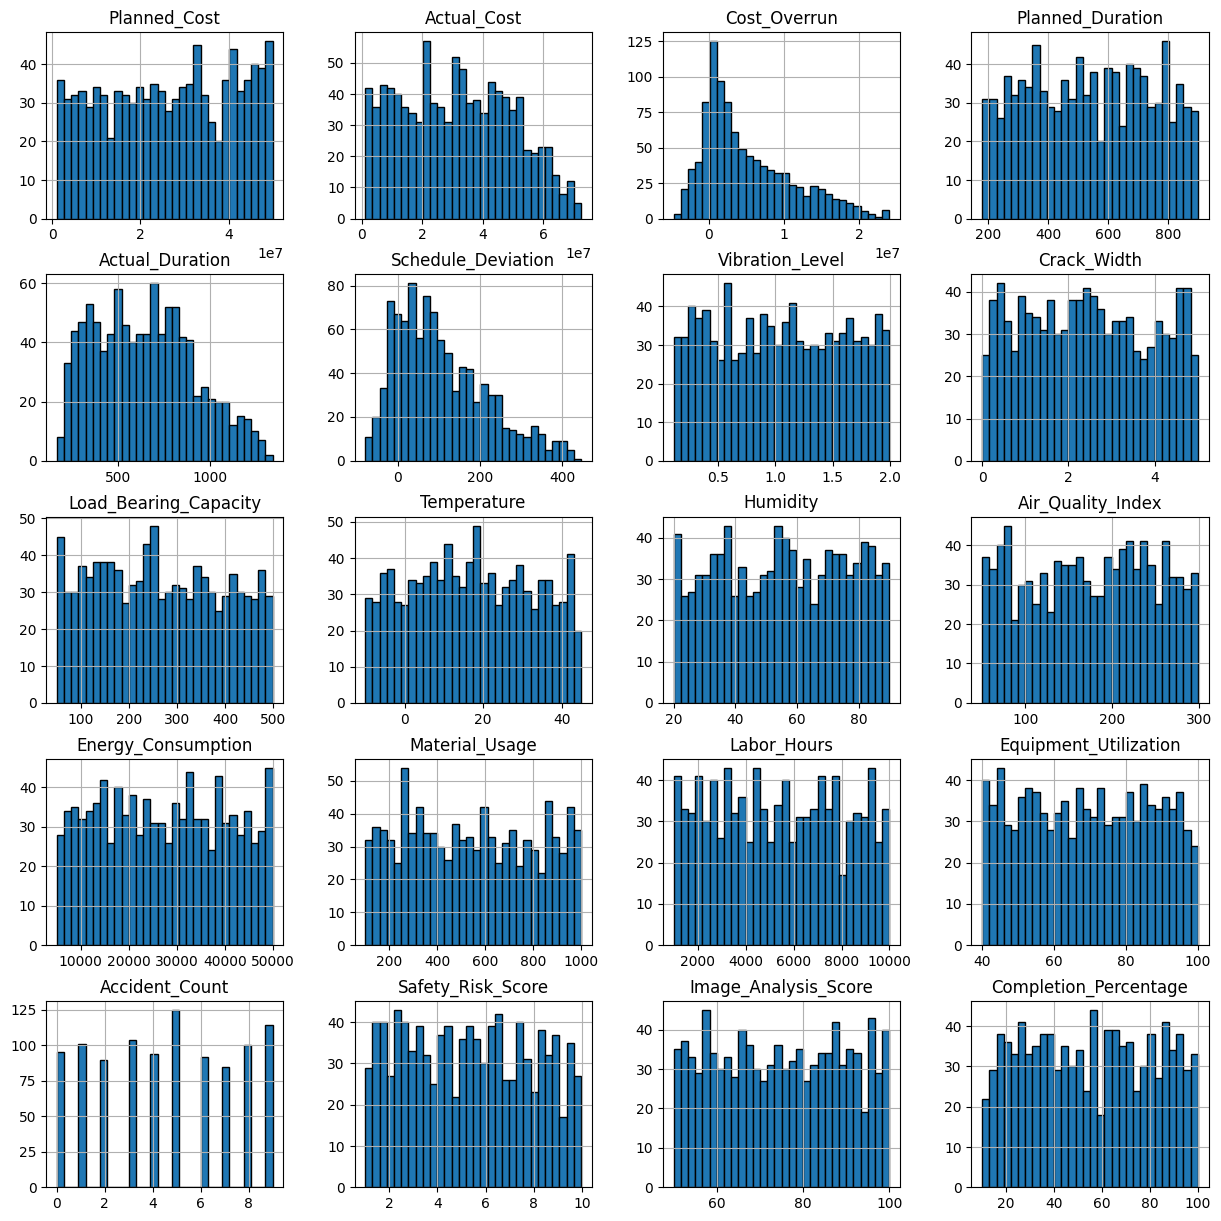

In [37]:
# distribution for numerical features
df[numerical_columns].hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.show()

In [38]:
df['Temperature'].agg(['mean', 'min', 'max', 'median'])

mean      17.114051
min       -9.997095
max       44.923953
median    17.194831
Name: Temperature, dtype: float64

In [39]:
df['Labor_Hours'].agg(['mean', 'min', 'max', 'median'])

mean      5395.218
min       1001.000
max       9997.000
median    5371.000
Name: Labor_Hours, dtype: float64

In [40]:
# skewness and kurtosis
print('Skewness\n')
print(df[numerical_columns].skew())  # Measures asymmetry (should be near 0)
print('\nKurtosis\n')
print(df[numerical_columns].kurtosis() ) # Measures peakedness (high values = heavy tails)

Skewness

Planned_Cost            -0.069686
Actual_Cost              0.151073
Cost_Overrun             0.935130
Planned_Duration        -0.001317
Actual_Duration          0.316841
Schedule_Deviation       0.771733
Vibration_Level          0.028058
Crack_Width              0.063653
Load_Bearing_Capacity    0.088112
Temperature              0.029728
Humidity                -0.036933
Air_Quality_Index       -0.055419
Energy_Consumption       0.034052
Material_Usage           0.071513
Labor_Hours              0.044208
Equipment_Utilization   -0.000593
Accident_Count          -0.003814
Safety_Risk_Score        0.060267
Image_Analysis_Score     0.015286
Completion_Percentage    0.018227
dtype: float64

Kurtosis

Planned_Cost            -1.221175
Actual_Cost             -0.970645
Cost_Overrun             0.117024
Planned_Duration        -1.192773
Actual_Duration         -0.699252
Schedule_Deviation      -0.024715
Vibration_Level         -1.214334
Crack_Width             -1.159036
Load_Bearing

**Skewness (Data Symmetry)**
Measures how asymmetric the data is.
Values close to 0 indicate a normal distribution.
Values greater than 1 or less than -1 indicate high skewness, which may require transformation.

`Key Observations:`
Most features are close to 0, meaning no major skewness issues.
Cost Overrun (0.93) and Schedule Deviation (0.77) are moderately right-skewed, indicating some extreme values.
Right-skewed features suggest some projects have high cost overruns or schedule delays.

`Possible Action:`
Investigate high-risk projects to understand cost and schedule deviations.
If needed, apply a log transformation to normalize right-skewed data.

**Kurtosis (Extreme Values and Outliers)**
Measures how heavy or flat the data tails are.
Normal distribution kurtosis = 3.
Negative values (less than 3) indicate flatter distributions with fewer extreme outliers.
Positive values (greater than 3) indicate heavy tails with potential outliers.

`Key Observations:`
All features have negative kurtosis, meaning thin tails with fewer extreme values.
Planned Cost (-1.22), Vibration Level (-1.21), and Completion Percentage (-1.22) are flatter than normal, showing stable distributions.
No strong outliers detected, but Cost Overrun and Schedule Deviation require further analysis.

`Possible Action:`
No immediate need for outlier removal, but high-risk projects should be analyzed further.

Skewness Before Transformation:
 Cost_Overrun          0.935130
Schedule_Deviation    0.771733
dtype: float64

Skewness After Transformation:
 Cost_Overrun         -1.099508
Schedule_Deviation   -1.431595
dtype: float64


C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



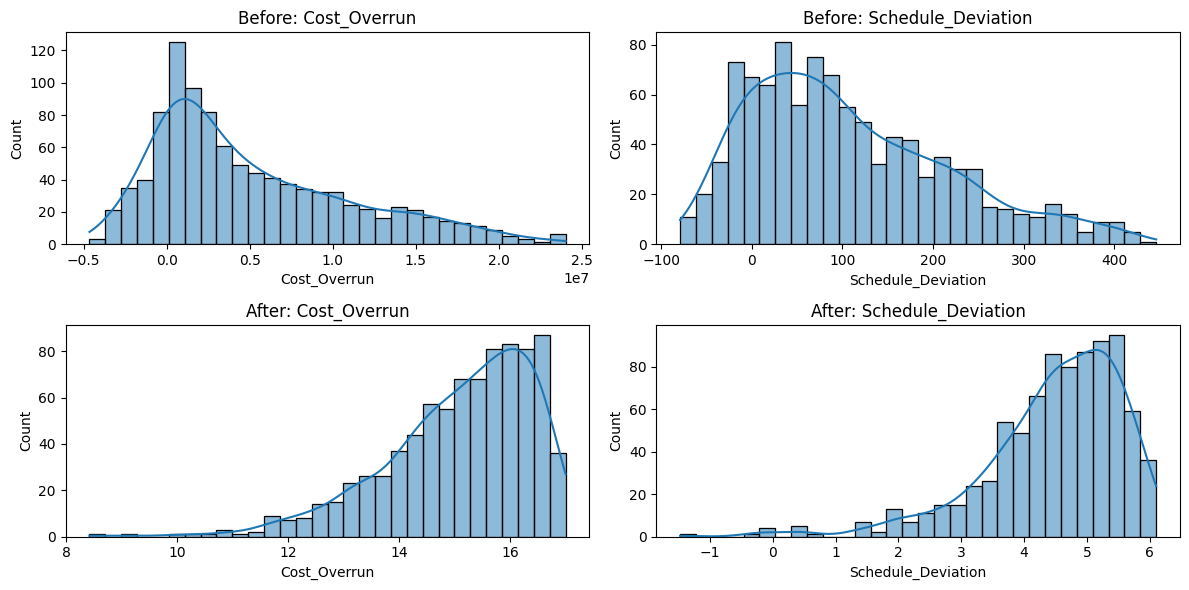

In [41]:
# Select columns to transform
columns_to_transform = ['Cost_Overrun', 'Schedule_Deviation']

# Apply log transformation
df_transformed = df.copy()
for col in columns_to_transform:
    df_transformed[col] = np.log1p(df[col])  # log(1 + x) to handle zero values

# Compare skewness before and after
before_skew = df[columns_to_transform].skew()
after_skew = df_transformed[columns_to_transform].skew()

# Print skewness results
print("Skewness Before Transformation:\n", before_skew)
print("\nSkewness After Transformation:\n", after_skew)

# Plot histograms before and after transformation
fig, axes = plt.subplots(2, len(columns_to_transform), figsize=(12, 6))
for i, col in enumerate(columns_to_transform):
    # Before transformation
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Before: {col}')
    
    # After transformation
    sns.histplot(df_transformed[col], bins=30, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'After: {col}')

plt.tight_layout()
plt.show()


In [42]:
from sklearn.preprocessing import PowerTransformer

# initialize power transformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')

# apply transformation
df[['Cost_Overrun', 'Schedule_Deviation']] = pt.fit_transform(df[['Cost_Overrun', 'Schedule_Deviation']])

# check skewness after transformation
skewness_after = df[['Cost_Overrun', 'Schedule_Deviation']].skew()
print("Skewness After Yeo-Johnson Transformation:\n", skewness_after)


Skewness After Yeo-Johnson Transformation:
 Cost_Overrun          0.368378
Schedule_Deviation    0.065051
dtype: float64


**Key Observations:**
Cost Overrun: Reduced from 0.93 to 0.37, meaning the distribution is now more symmetrical.
Schedule Deviation: Reduced from 0.77 to 0.07, indicating near-normality.

**Next Steps:**
These values are acceptable, so further transformations are not necessary.
You can proceed with feature scaling (like StandardScaler) if needed.

In [43]:
df.head().T

,0,1,2,3,4
Project_ID,PJT_1,PJT_2,PJT_3,PJT_4,PJT_5
Project_Type,Tunnel,Dam,Building,Dam,Dam
Location,Houston,Houston,Houston,Houston,Seattle
Start_Date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05
End_Date,2021-09-26,2020-12-06,2021-12-05,2022-04-12,2022-02-12
Planned_Cost,12260784,2369277,23299783,24499306,1749971
Actual_Cost,15054504.045889,3507053.961512,21692126.701511,29469660.498189,2329338.04359
Cost_Overrun,-0.275376,-0.537403,-1.441877,0.060209,-0.628478
Planned_Duration,699,269,899,809,354
Actual_Duration,813.914852,384.118221,1081.777915,974.565655,347.990127


# Data Preprocesing

In [44]:
# Convert Start_Date and End_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Verify the changes
print(df[['Start_Date', 'End_Date']].dtypes)

Start_Date    datetime64[ns]
End_Date      datetime64[ns]
dtype: object


## Data Scaling
Apply Standardization (Z-score scaling) using StandardScaler from sklearn.preprocessing.
* Identify Numeric Features: Exclude categorical variables like Project_Type, Location, and Weather_Condition.
* Apply StandardScaler: Transform numeric features to have mean = 0 and standard deviation = 1.
* Keep Categorical Variables: Encode them separately if needed.

In [45]:
from sklearn.preprocessing import StandardScaler

# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric features
df_scaled = df.copy()  # Preserve original structure
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# Ensure categorical features remain unchanged
df_scaled[categorical_features] = df[categorical_features]

df_scaled.head()

,Project_ID,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,...,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
0,PJT_1,Tunnel,Houston,2020-01-01,2021-09-26,-0.977607,-0.911520,-0.275376,0.784525,0.625272,...,-0.169257,-1.134232,0.461333,0.394696,1.193085,0.335466,-1.502058,-0.495308,1.543318,High
1,PJT_2,Dam,Houston,2020-01-02,2020-12-06,-1.660792,-1.549962,-0.537403,-1.318890,-0.971006,...,1.665990,-1.064786,0.659738,-0.341297,0.150482,-1.248569,-1.646047,-0.495308,-1.157938,Low
2,PJT_3,Building,Houston,2020-01-03,2021-12-05,-0.215167,-0.544535,-1.441877,1.762857,1.620124,...,1.598802,0.249170,1.743511,-1.287943,-0.892121,-0.866293,1.300051,-0.495308,1.639124,Medium
3,PJT_4,Dam,Houston,2020-01-04,2022-04-12,-0.132319,-0.114526,0.060209,1.322608,1.221935,...,-0.583928,0.494549,-0.638497,1.002402,0.150482,-0.492948,1.063684,2.018946,1.546874,High
4,PJT_5,Dam,Seattle,2020-01-05,2022-02-12,-1.703566,-1.615077,-0.628478,-0.903099,-1.105187,...,1.343010,0.843691,-0.392688,-0.439286,0.498017,-1.004633,0.237570,-0.495308,-0.447661,Low


In [46]:
categorical_features

Index(['Project_ID', 'Project_Type', 'Location', 'Weather_Condition',
       'Risk_Level'],
      dtype='object')

## Encoding
* One-hot encoding for categorical features (Project_Type, Location, Weather_Condition, and Anomaly_Detected).
* Ordinal encoding for Risk_Level with {'Low': 0, 'Medium': 1, 'High': 2}.

In [47]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Define categorical features (excluding 'Risk_Level')
categorical_features = ['Project_Type', 'Location', 'Weather_Condition']

# One-hot encoding for categorical features
df_enc = pd.get_dummies(df_scaled, columns=categorical_features, drop_first=True, dtype=int)

# Ordinal encoding for 'Risk_Level'
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df_enc['Risk_Level'] = ordinal_encoder.fit_transform(df_scaled[['Risk_Level']])

df_enc.head()


,Project_ID,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,...,Project_Type_Road,Project_Type_Tunnel,Location_Houston,Location_Los Angeles,Location_New York,Location_Seattle,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Stormy,Weather_Condition_Sunny
0,PJT_1,2020-01-01,2021-09-26,-0.977607,-0.911520,-0.275376,0.784525,0.625272,0.189715,0.890226,...,0,1,1,0,0,0,0,1,0,0
1,PJT_2,2020-01-02,2020-12-06,-1.660792,-1.549962,-0.537403,-1.318890,-0.971006,0.191360,-0.647773,...,0,0,1,0,0,0,0,1,0,0
2,PJT_3,2020-01-03,2021-12-05,-0.215167,-0.544535,-1.441877,1.762857,1.620124,0.719996,-0.169453,...,0,0,1,0,0,0,0,0,0,0
3,PJT_4,2020-01-04,2022-04-12,-0.132319,-0.114526,0.060209,1.322608,1.221935,0.588577,-0.316220,...,0,0,1,0,0,0,0,0,0,0
4,PJT_5,2020-01-05,2022-02-12,-1.703566,-1.615077,-0.628478,-0.903099,-1.105187,-0.995030,1.681946,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# Drop 'Risk_Level_Low' and 'Risk_Level_Medium' if they exist
columns_to_drop = ['Risk_Level_Low', 'Risk_Level_Medium', 'Project_ID']
df_enc = df_enc.drop(columns=[col for col in columns_to_drop if col in df_enc.columns], errors='ignore')

df_enc.head()

,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,...,Project_Type_Road,Project_Type_Tunnel,Location_Houston,Location_Los Angeles,Location_New York,Location_Seattle,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Stormy,Weather_Condition_Sunny
0,2020-01-01,2021-09-26,-0.977607,-0.911520,-0.275376,0.784525,0.625272,0.189715,0.890226,0.247259,...,0,1,1,0,0,0,0,1,0,0
1,2020-01-02,2020-12-06,-1.660792,-1.549962,-0.537403,-1.318890,-0.971006,0.191360,-0.647773,0.874350,...,0,0,1,0,0,0,0,1,0,0
2,2020-01-03,2021-12-05,-0.215167,-0.544535,-1.441877,1.762857,1.620124,0.719996,-0.169453,0.597519,...,0,0,1,0,0,0,0,0,0,0
3,2020-01-04,2022-04-12,-0.132319,-0.114526,0.060209,1.322608,1.221935,0.588577,-0.316220,-0.475613,...,0,0,1,0,0,0,0,0,0,0
4,2020-01-05,2022-02-12,-1.703566,-1.615077,-0.628478,-0.903099,-1.105187,-0.995030,1.681946,1.112481,...,0,0,0,0,0,1,0,0,0,0


# Modeling
* For the baseline Model, use Logistic Regression (Multinomial) since it's simple and interpretable hence good for benchmarking other models.
* The second one will be Random Forest as it handles non-linearity and feature interactions well. It is robust to outliers and provides feature importance for insights

### Data Splitting

In [49]:
# train-test split of the data
from sklearn.model_selection import train_test_split

# Define features and target
X = df_enc.drop(columns=['Risk_Level'])  # Features
y = df_enc['Risk_Level']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 35), (200, 35), (800,), (200,))

- `X_train` has 800 samples with 36 features
- `X_test` has 200 samples with 36 features
- `y_train` has 800 labels
- `y_test` has 200 labels

### Baseline Model - Logistirc Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns

# Drop datetime columns if they exist
X_train = X_train.drop(columns=datetime_cols, errors='ignore')
X_test = X_test.drop(columns=datetime_cols, errors='ignore')

# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        31
         1.0       0.98      0.94      0.96        69
         2.0       0.99      0.99      0.99       100

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Accuracy: 0.975


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [54]:
# evaluate performance
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Print accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy:.3f}")

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        31
         1.0       0.86      0.97      0.91        69
         2.0       0.99      0.92      0.95       100

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200

Accuracy: 0.935
